# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#lists to append data into 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#begin count 
record = 1 

#statements 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#identify api 
api_key = api_keys.api_key
#URL 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#start loop 
for city in cities:

    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")

        # increase counter
        record = record + 1
        #time loop
        time.sleep(1.01)

    #skip record 
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=husavik
Processing Record 2 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=bethel
Processing Record 3 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=leningradskiy
Processing Record 4 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=avarua
Processing Record 5 | Fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=fare
Processing Record 6 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=chokurdakh
Processing Record 7 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperia

City not found. Skipping...
Processing Record 56 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=dikson
Processing Record 57 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=saskylakh
Processing Record 58 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=arraial do cabo
Processing Record 59 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=hobart
Processing Record 60 | Visby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=visby
Processing Record 61 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=hilo
Processing Record 62 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7

Processing Record 111 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=vaini
City not found. Skipping...
Processing Record 112 | Cavalcante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=cavalcante
Processing Record 113 | Bloomfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=bloomfield
Processing Record 114 | Afzalpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=afzalpur
Processing Record 115 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=port lincoln
Processing Record 116 | Wadi Maliz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=wadi maliz
City not found. Skipping...
City not found. Skipping...
Processing Record 117 | Bischhei

Processing Record 166 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=sao joao da barra
Processing Record 167 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=avera
Processing Record 168 | Antequera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=antequera
Processing Record 169 | Chistogorskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=chistogorskiy
Processing Record 170 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=saint george
Processing Record 171 | Port Keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=port keats
Processing Record 172 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 220 | Bethanien
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=bethanien
Processing Record 221 | Almonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=almonte
Processing Record 222 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=san patricio
Processing Record 223 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=saint-philippe
Processing Record 224 | Kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=kamaishi
Processing Record 225 | Gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=gamba
Processing Record 226 | Banjarmasin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7

Processing Record 276 | Mastic Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=mastic beach
City not found. Skipping...
Processing Record 277 | Moissala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=moissala
Processing Record 278 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=amapa
Processing Record 279 | Katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=katobu
Processing Record 280 | Elizabeth City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=elizabeth city
Processing Record 281 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=kodiak
Processing Record 282 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 332 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=cabedelo
Processing Record 333 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=yar-sale
Processing Record 334 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=port moresby
Processing Record 335 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=zhigansk
Processing Record 336 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=aykhal
Processing Record 337 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=khatanga
Processing Record 338 | Tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f36646331

Processing Record 388 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=okhotsk
Processing Record 389 | Chambas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=chambas
Processing Record 390 | Tupik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=tupik
Processing Record 391 | Khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=khani
Processing Record 392 | Madras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=madras
Processing Record 393 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=huarmey
Processing Record 394 | Cua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=cua
Processing Record

Processing Record 444 | Linkou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=linkou
Processing Record 445 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=egvekinot
Processing Record 446 | Marquette
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=marquette
Processing Record 447 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=dingle
Processing Record 448 | Tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=tual
Processing Record 449 | Knin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=knin
Processing Record 450 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=padang
City not 

Processing Record 499 | Taksimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=taksimo
Processing Record 500 | Shuyskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=shuyskoye
Processing Record 501 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=rawson
Processing Record 502 | Minot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=minot
Processing Record 503 | Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=hualmay
City not found. Skipping...
Processing Record 504 | Nyuksenitsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49dfa92b32f7c2e269f366463318e99f&q=nyuksenitsa
City not found. Skipping...
Processing Record 505 | Mitu
http://api.openweathermap.org/data/2.5/weather?unit

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather = {"City":city_name,
            "Cloudiness": cloudiness,
            "Country": country,
            "Date": date,
            "Humidity": humidity,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Wind Speed": wind_speed}

weather_data = pd.DataFrame(weather) 

In [12]:
weather_data.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [18]:
weather_data.to_csv('Weather.csv', index=False)

In [19]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Husavik,76,CA,1547420000,91,50.56,-96.99,15.13,4.43
1,Bethel,90,US,1547418360,93,60.79,-161.76,37.40,9.17
2,Leningradskiy,36,RU,1547420004,97,69.38,178.42,-16.33,12.03
3,Avarua,75,CK,1547416800,70,-21.21,-159.78,84.20,8.05
4,Fare,80,PF,1547420007,100,-16.70,-151.02,80.92,14.27


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

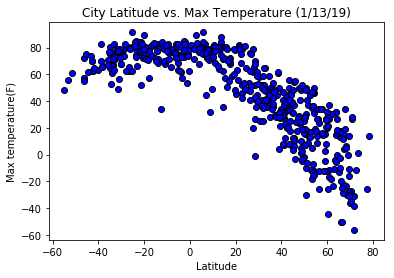

In [23]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

#add the circle size
plt.title("City Latitude vs. Max Temperature (1/13/19)")
plt.xlabel("Latitude")
plt.ylabel("Max temperature(F)")






# Save Figure
plt.savefig("../Images/LatitudevTemp.png")
plt.show()

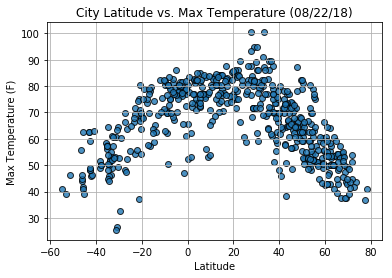

#### Latitude vs. Humidity Plot

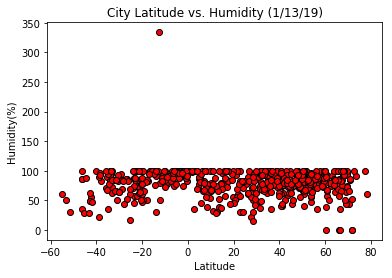

In [25]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker="o", facecolors="red", edgecolors="black")

#add the circle size
plt.title("City Latitude vs. Humidity (1/13/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")






# Save Figure
plt.savefig("../Images/LatitudevHumid.png")
plt.show()

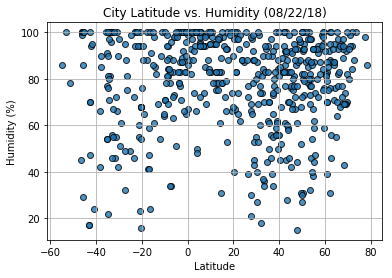

#### Latitude vs. Cloudiness Plot

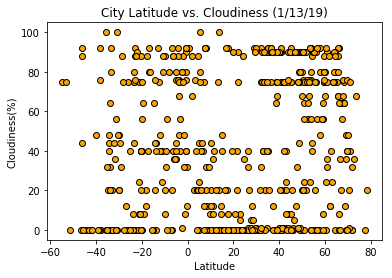

In [27]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker="o", facecolors="orange", edgecolors="black")

#add the circle size
plt.title("City Latitude vs. Cloudiness (1/13/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save Figure
plt.savefig("../Images/LatitudevCloud.png")
plt.show()

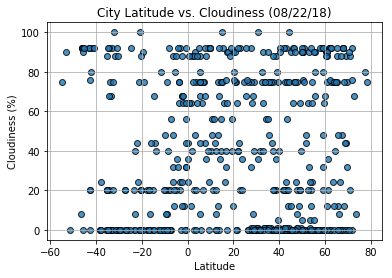

#### Latitude vs. Wind Speed Plot

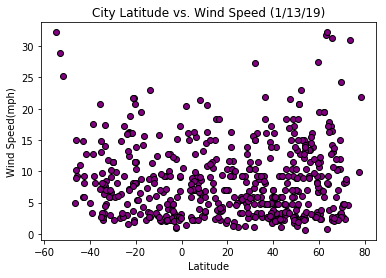

In [29]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker="o", facecolors="purple", edgecolors="black")

#add the circle size
plt.title("City Latitude vs. Wind Speed (1/13/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Save Figure
plt.savefig("../Images/LatitudevWind.png")
plt.show()

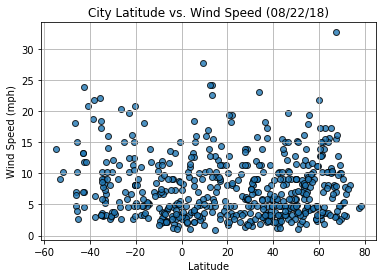